# Graphs

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

This notebook is adapted from Chapter 2 of [Think Complexity](https://greenteapress.com/wp/think-complexity-2e/).

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

## Graph

NetworkX provides functions and data structures to represent graphs.
As an example, we'll make a small graph that represents a social network.
In this graph, each node is a person, and an edge between people represents a friendship.

Here's how we make a graph and add nodes.

In [1]:
import networkx as nx

G = nx.Graph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Carol')
list(G.nodes())

['Alice', 'Bob', 'Carol']

Here's how we add edges between nodes.

In [2]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Carol')
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Carol')]

And here's how to draw the graph.

In [3]:
import matplotlib.pyplot as plt

def draw_graph(G):
    nx.draw_circular(G, node_size=1500, with_labels=True)

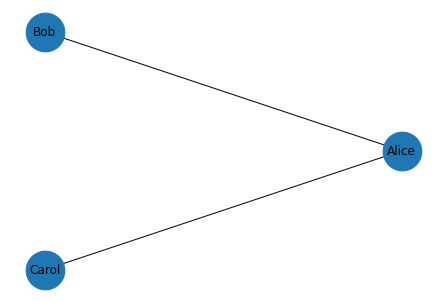

In [4]:
draw_graph(G)

**Exercise:**  Suppose Alice introduces Bob and Carol, and they become friends. Update the social network by adding an edge between Bob and Carol, then draw it again.

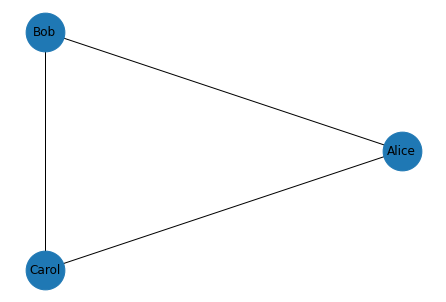

In [5]:
# Solution

G.add_edge('Bob', 'Carol')
draw_graph(G)

## Complete graph

In a complete graph, all nodes are connected to each other.
To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [6]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and with edges between all pairs of nodes.

In [7]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [8]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

And here's what it looks like.

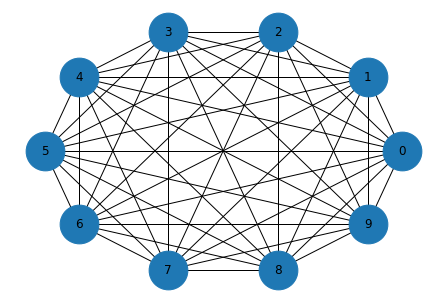

In [9]:
draw_graph(complete)

## Graph Representation

NetworkX represents graphs using a dictionary that maps from each node to a dictionary that maps from nodes to edges.

If we select an element from the top-level dictionary, the result is a dictionary-like object.

In [10]:
complete[0]

AtlasView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

In [11]:
for key, value in complete[0].items():
    print(key, value)

1 {}
2 {}
3 {}
4 {}
5 {}
6 {}
7 {}
8 {}
9 {}


And we can select an edge like this:

In [12]:
complete[0][1]

{}

Edges are represented by dictionaries of attributes. In this example, the edges don't have any attributes, so the dictionaries are empty.

To check whether there is an edge from one node to another, we can use the `in` operator:

In [13]:
def has_edge(G, i, j):
    return j in G[i]

In [14]:
has_edge(complete, 0, 1)

True

In [15]:
has_edge(complete, 0, 11)

False

But there's a method that does the same thing.

In [16]:
complete.has_edge(0, 1)

True

There's also a method called `neighbors` that takes a node and returns an iterator through the neighboring nodes.

In [17]:
complete.neighbors(0)

In [18]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns `True` with probability `p` and `False` with probability `1-p`

In [19]:
import random

def flip(p):
    return random.random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [20]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [21]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [22]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

15

And here's what it looks like:

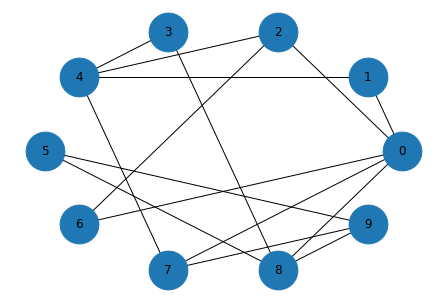

In [23]:
draw_graph(random_graph)

## Connectivity

A graph is **connected** if you can start from any node and follow a sequence of edges to reach any other node.

To check whether a graph is connected, we'll use a version of a depth-first search.
First, let's see what goes wrong with a basic DFS; then we'll fix the problem.

In [24]:
def basic_dfs(G, start):
    stack = [start]
    
    while stack:
        node = stack.pop()
        print(node)
        stack.extend(G.neighbors(node))

In [25]:
# basic_dfs(random_graph, 0)

For most graphs, the basic version of DFS runs forever, because it visits the same nodes over and over.
The solution is to keep track of the nodes we've seen and avoid visiting them more than once.

**Exercise:** Write a function called `reachable_nodes` that takes a graph and a starting node, uses DFS to find all nodes that can be reached from the starting node, and returns a collection that contains them.

Hint: Think about what kind of collection to use.

In [26]:
# Solution

def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [27]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In a random graph, it may or may not be possible to reach all nodes.

In [28]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

So we can use `reachable_nodes` to check whether a graph is connected:

In [29]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [30]:
is_connected(complete)

True

If we generate a random graph with a low value of `p`, it's probably not connected.

In [31]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

5

In [32]:
is_connected(random_graph)

False

If we generate a random graph with a high value of `p`, it's probably not connected.

In [33]:
random_graph = make_random_graph(10, 0.9)
len(random_graph.edges())

39

In [34]:
is_connected(random_graph)

True

## Probability of connectivity

This behavior is the topic of a [seminal paper in network science](https://www.renyi.hu/~p_erdos/1960-10.pdf).
We can use NetworkX and the functions we've written to replicate one of their results.

The following function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [35]:
import numpy as np

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

With `n=10` and `p=0.23`, the probability of being connected is about 33%.

In [36]:
n = 10
prob_connected(n, 0.23, iters=10000)

0.3467

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [37]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [38]:
ps = np.logspace(-1.3, 0, 11)
ps

array([0.05011872, 0.0676083 , 0.09120108, 0.12302688, 0.16595869,
       0.22387211, 0.30199517, 0.40738028, 0.54954087, 0.74131024,
       1.        ])

I'll estimate the probabilities with `iters=1000`

In [39]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.05011872336272722 0.0
0.06760829753919818 0.002
0.09120108393559097 0.001
0.12302687708123815 0.019
0.16595869074375605 0.101
0.22387211385683395 0.319
0.3019951720402016 0.672
0.40738027780411273 0.916
0.5495408738576245 0.997
0.7413102413009173 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

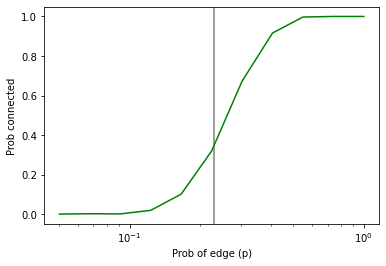

In [40]:
plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
plt.xlabel('Prob of edge (p)')
plt.ylabel('Prob connected')
plt.xscale('log')

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [41]:
# Solution

"""Checking the nodes before putting them on the stack does not affect the order 
of growth; we have to perform the same number of checks either way.  But it might 
be a little faster because it avoids the overhead of adding and removing nodes 
from the stack over and over."""

def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            neighbors = set(G[node]) - seen
            stack.extend(neighbors)
    return seen

complete = make_complete_graph(100)

In [42]:
%timeit len(reachable_nodes(complete, 0))

499 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%timeit len(reachable_nodes_precheck(complete, 0))

568 µs ± 703 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
